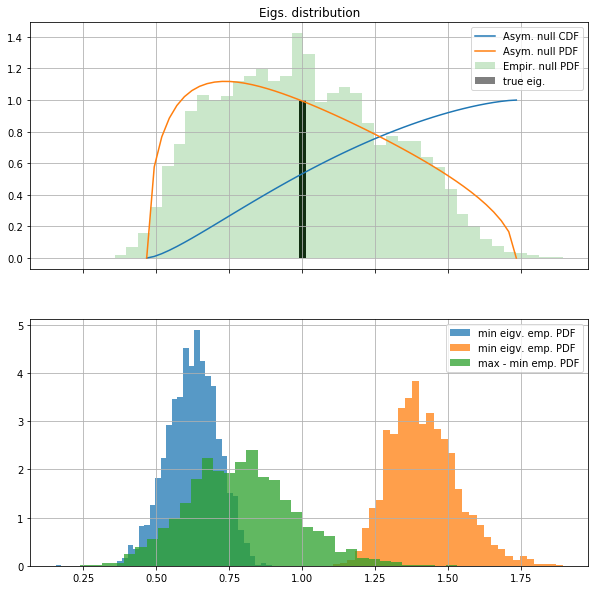

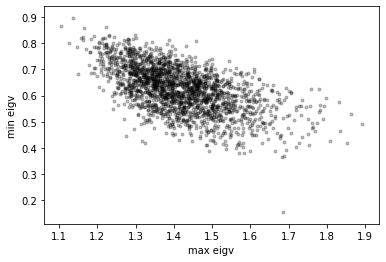

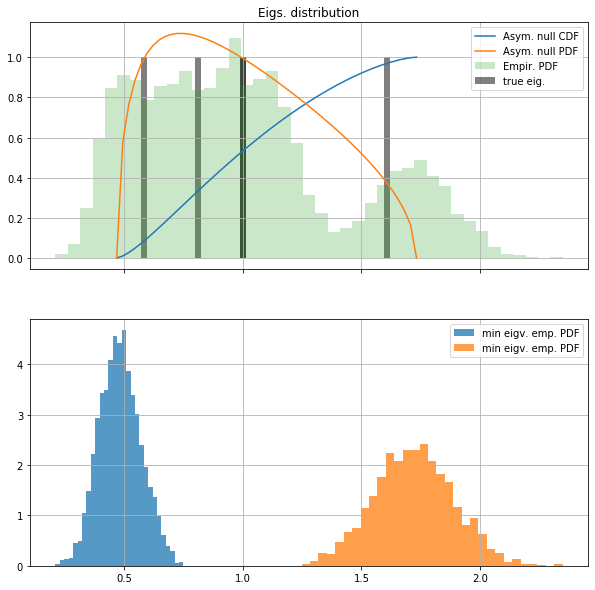

In [125]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import marchenko_pastur as mp


p = 5
n = 10*p
nsim = 2000
mpdist = mp.marchenko_pastur(p, n)

mcorr0 = np.eye(p)
mcorr1 = mcorr0.copy()
mcorr1[0,1]=mcorr1[1,0] = 0.2
mcorr1[0,2]=mcorr1[2,0] = 0.3
mcorr1[1,2]=mcorr1[2,1] = 0.4
#vol = np.ones(p)
#mcov = np.diag(vol) @ mcorr @ np.diag(vol)
gen0 = stats.multivariate_normal(cov=mcorr0)
gen1 = stats.multivariate_normal(cov=mcorr1)


if 0: # Cutoff
    print('===== true corr =====')
    print(mcorr1)
    print('===== true corr eigs =====')
    print( np.linalg.eigvals(mcorr1) )
    
    # ===== est =====
    hh = gen1.rvs(n)
    hcorr = np.corrcoef(hh,rowvar=False)
    print('Fro norm naive {}'.format( np.linalg.norm(hcorr - mcorr1, 'fro') ))
    ub = mpdist.ubound()
    u,d,vt = np.linalg.svd(hcorr)
    
    print('===== cut =====')
    k = d < ub*0.5
    print(k)
    
    gamma = d[k].mean()
    d[k] = gamma
    corr_cln = u @ np.diag(d) @ vt
    print('===== cleaned matrix =====')
    print('Fro norm new {}'.format( np.linalg.norm(corr_cln - mcorr1, 'fro') ))
    print('Fro norm I {}'.format( np.linalg.norm(np.eye(mcorr1.shape[0]) - mcorr1, 'fro') ))

    k = 1/0



gen = [gen0, gen1]
# estimators
def simulate(g):
    data_eig = np.empty((nsim, p))
    for i in range(nsim):
        mcorr_hat = np.corrcoef(g.rvs(n), rowvar=False)
        eigs = np.linalg.eigvals(mcorr_hat)
        data_eig[i] = eigs
    return data_eig

eig0 = simulate(gen0)
eig1 = simulate(gen1)


x = np.linspace(mpdist.lbound(), mpdist.ubound(), 50)

# ==== H0 =====
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,10))
axs[0].bar(np.linalg.eigvals(mcorr0), np.ones(p), width=0.025, alpha=0.5, color='k', label='true eig.')
axs[0].set_title('Eigs. distribution')
axs[0].plot(x, mpdist.cdf(x), label='Asym. null CDF')
axs[0].plot(x, mpdist.pdf(x), label='Asym. null PDF')
axs[0].hist(eig0.flatten(), bins='auto', density=True, alpha=0.25, label='Empir. null PDF')

#axs[1].set_title('Min Max eigv. emp. dist')
axs[1].hist(np.min(eig0, axis=1), bins='auto', density=True, alpha=0.75, label='min eigv. emp. PDF')
axs[1].hist(np.max(eig0, axis=1), bins='auto', density=True, alpha=0.75, label='min eigv. emp. PDF')
axs[1].hist(np.max(eig0, axis=1)-np.min(eig0, axis=1), bins='auto', density=True, alpha=0.75, label='max - min emp. PDF')

for ax in axs:
    ax.grid(True); ax.legend(loc='best')

plt.figure()
plt.scatter(np.max(eig0, axis=1), np.min(eig0, axis=1), c='k', marker='.', alpha='0.25')
plt.xlabel('max eigv')
plt.ylabel('min eigv')


# ==== H1 =====
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,10))
axs[0].bar(np.linalg.eigvals(mcorr1), np.ones(p), width=0.025, alpha=0.5, color='k', label='true eig.')

axs[0].set_title('Eigs. distribution')
axs[0].plot(x, mpdist.cdf(x), label='Asym. null CDF')
axs[0].plot(x, mpdist.pdf(x), label='Asym. null PDF')
axs[0].hist(eig1.flatten(), bins='auto', density=True, alpha=0.25, label='Empir. PDF')
axs[0].grid(True); axs[0].legend(loc='best')

#axs[1].set_title('Min Max eigv. emp. dist')
axs[1].hist(np.min(eig1, axis=1), bins='auto', density=True, alpha=0.75, label='min eigv. emp. PDF')
axs[1].hist(np.max(eig1, axis=1), bins='auto', density=True, alpha=0.75, label='min eigv. emp. PDF')

for ax in axs:
    ax.grid(True); ax.legend(loc='best')

plt.show()

In [127]:
corr = np.eye(2)
corr[0,1] = corr[1,0] = 0.5
print(np.linalg.eigvals(corr))
vols = np.array([0.1, 0.2])
cov = np.diag(vols) @ corr @ np.diag(vols)
print(np.linalg.eigvals(cov))

[1.5 0.5]
[0.00697224 0.04302776]
